## Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
# All trials with Epilepsy as key term
# https://clinicaltrials.gov/ct2/results?cond=Epilepsy&age_v=&gndr=&type=&rslt=&Search=Apply
data = pd.read_csv('./data/SearchResults.csv')

## EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     1826 non-null   int64  
 1   NCT Number               1826 non-null   object 
 2   Title                    1826 non-null   object 
 3   Acronym                  484 non-null    object 
 4   Status                   1826 non-null   object 
 5   Study Results            1826 non-null   object 
 6   Conditions               1826 non-null   object 
 7   Interventions            1608 non-null   object 
 8   Outcome Measures         1723 non-null   object 
 9   Sponsor/Collaborators    1826 non-null   object 
 10  Gender                   1824 non-null   object 
 11  Age                      1826 non-null   object 
 12  Phases                   1315 non-null   object 
 13  Enrollment               1796 non-null   float64
 14  Funded Bys              

In [4]:
print(len(data))
data.isna().sum()

1826


Rank                          0
NCT Number                    0
Title                         0
Acronym                    1342
Status                        0
Study Results                 0
Conditions                    0
Interventions               218
Outcome Measures            103
Sponsor/Collaborators         0
Gender                        2
Age                           0
Phases                      511
Enrollment                   30
Funded Bys                    0
Study Type                    0
Study Designs                49
Other IDs                     0
Start Date                   25
Primary Completion Date     141
Completion Date              59
First Posted                  0
Results First Posted       1463
Last Update Posted            0
Locations                   243
Study Documents            1704
URL                           0
dtype: int64

In [5]:
from customUtils import *

## Clean Date Columns

In [6]:
data_cleaned = data.copy(deep=True)
date_columns = ['Start Date', 'Primary Completion Date', 
                'Completion Date', 'First Posted', 
                'Results First Posted', 'Last Update Posted']
for date_col in date_columns:
    #print(date_col)
    data_cleaned[date_col] = data_cleaned[date_col].apply(clean_date)
    gen_future_flag(data_cleaned, date_col)

In [7]:
example_date_report = gen_date_report_df(data_cleaned, date_columns)    

In [8]:
df = example_date_report.iloc[5]

## Column EDA

In [9]:
data_cleaned['Status'].unique()

array(['Recruiting', 'Completed', 'Enrolling by invitation',
       'Not yet recruiting', 'Unknown status', 'No longer available',
       'Suspended', 'Active, not recruiting', 'Terminated', 'Withdrawn',
       'Available', 'Approved for marketing'], dtype=object)

In [10]:
data_cleaned.head(2)

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,Gender,Age,Phases,Enrollment,Funded Bys,Study Type,Study Designs,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL,Start Date Future Flag,Primary Completion Date Future Flag,Completion Date Future Flag,First Posted Future Flag,Results First Posted Future Flag,Last Update Posted Future Flag
0,1,NCT04944641,Epilepsy Prevalence and Intervention Study in ...,NaN,Recruiting,No Results Available,Epilepsy,Behavioral: education on epilepsy|Drug: routin...,Change from baseline seizures frequency 1|Chan...,"Second Affiliated Hospital, School of Medicine...",All,"14 Years and older (Child, Adult, Older Adult)",Not Applicable,200.0,Other,Interventional,Allocation: Randomized|Intervention Model: Par...,2013-032,2013-09-13,2022-09-30,2022-12-31,2021-06-29,NaT,2021-07-19,"2nd Affiliated Hospital, School of Medicine, Z...",NaN,https://ClinicalTrials.gov/show/NCT04944641,0,0,1,0,0,0
1,2,NCT05384782,Computational Decision Support in Epilepsy Usi...,NaN,Completed,No Results Available,Epilepsy,NaN,To validate a set of computational biomarkers ...,Cornwall Partnership NHS Foundation Trust|Neur...,All,"18 Years and older (Adult, Older Adult)",NaN,825.0,Other,Observational,Observational Model: Cohort|Time Perspective: ...,Version 10|260729,2019-12-01,2021-12-31,2022-03-31,2022-05-20,NaT,2022-05-20,"Cornwall Partnership NHS Foundation Trust, Bod...","""Study Protocol"", https://ClinicalTrials.gov/P...",https://ClinicalTrials.gov/show/NCT05384782,0,0,0,0,0,0


In [11]:
#Plot date columns

In [12]:
data_cleaned['Interventions'].unique()

array(['Behavioral: education on epilepsy|Drug: routine and proper antiepileptic drugs',
       nan, 'Other: Neuropsychological examination', ...,
       'Procedure: Hypnosis', 'Drug: Talampanel', 'Drug: Ginkgo Biloba'],
      dtype=object)

In [13]:
data_cleaned['Age'].unique()[:10]

array(['14 Years and older \xa0 (Child, Adult, Older Adult)',
       '18 Years and older \xa0 (Adult, Older Adult)',
       '30 Years and older \xa0 (Adult, Older Adult)',
       'Child, Adult, Older Adult', '1 Year to 15 Years \xa0 (Child)',
       '18 Years to 65 Years \xa0 (Adult, Older Adult)',
       '18 Years to 90 Years \xa0 (Adult, Older Adult)',
       '3 Years and older \xa0 (Child, Adult, Older Adult)',
       '1 Day to 16 Years \xa0 (Child)',
       '18 Years to 50 Years \xa0 (Adult)'], dtype=object)

In [14]:
data_cleaned['Age'] = data_cleaned['Age'].apply(clean_age)
data_cleaned[['Age Range', 'Age Category']] = pd.DataFrame(data_cleaned['Age'].to_list())

In [15]:
data_cleaned.head(2)

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,Gender,Age,Phases,Enrollment,Funded Bys,Study Type,Study Designs,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL,Start Date Future Flag,Primary Completion Date Future Flag,Completion Date Future Flag,First Posted Future Flag,Results First Posted Future Flag,Last Update Posted Future Flag,Age Range,Age Category
0,1,NCT04944641,Epilepsy Prevalence and Intervention Study in ...,NaN,Recruiting,No Results Available,Epilepsy,Behavioral: education on epilepsy|Drug: routin...,Change from baseline seizures frequency 1|Chan...,"Second Affiliated Hospital, School of Medicine...",All,"[14 years and older, child | adult | older adult]",Not Applicable,200.0,Other,Interventional,Allocation: Randomized|Intervention Model: Par...,2013-032,2013-09-13,2022-09-30,2022-12-31,2021-06-29,NaT,2021-07-19,"2nd Affiliated Hospital, School of Medicine, Z...",NaN,https://ClinicalTrials.gov/show/NCT04944641,0,0,1,0,0,0,14 years and older,child | adult | older adult
1,2,NCT05384782,Computational Decision Support in Epilepsy Usi...,NaN,Completed,No Results Available,Epilepsy,NaN,To validate a set of computational biomarkers ...,Cornwall Partnership NHS Foundation Trust|Neur...,All,"[18 years and older, adult | older adult]",NaN,825.0,Other,Observational,Observational Model: Cohort|Time Perspective: ...,Version 10|260729,2019-12-01,2021-12-31,2022-03-31,2022-05-20,NaT,2022-05-20,"Cornwall Partnership NHS Foundation Trust, Bod...","""Study Protocol"", https://ClinicalTrials.gov/P...",https://ClinicalTrials.gov/show/NCT05384782,0,0,0,0,0,0,18 years and older,adult | older adult


In [16]:
data['Study Type'].unique()

array(['Interventional', 'Observational', 'Expanded Access',
       'Expanded Access:Intermediate-size Population',
       'Expanded Access:Individual Patients',
       'Expanded Access:Treatment IND/Protocol',
       'Expanded Access:Individual Patients|Treatment IND/Protocol'],
      dtype=object)

In [17]:
data['Conditions'].unique() [10:23]

## Multi lined bullet points are converted into | when downloading

array(['Epilepsy|Epilepsy Intractable', 'Epilepsies',
       'Drug Refractory Epilepsy', 'Epilepsy Intractable',
       'Drug Resistant Epilepsy', 'Absence Epilepsy|Epilepsy, Absence',
       'Epilepsy|Epilepsy, Temporal Lobe',
       'Epilepsy Generalized Idiopathic Not Intractable',
       'Childhood Absence Epilepsy|Juvenile Absence Epilepsy',
       'Juvenile Myoclonic Epilepsy', 'Epilepsy Syndrome',
       'Catamenial Epilepsy', 'Epilepsy, Post-Traumatic'], dtype=object)

## Showcase Date Columns

In [18]:
example_date_report

,Column,Total Count,Null Count,Invalid Date Count,Future Date Count,Current Date Count,Null Percent,Invalid Date Percent,Future Date Percent
0,Start Date,1826,25,0,24,1777,1.37,0.0,1.31
1,Primary Completion Date,1826,141,0,401,1284,7.72,0.0,21.96
2,Completion Date,1826,59,0,452,1315,3.23,0.0,24.75
3,First Posted,1826,0,0,0,1826,0.00,0.0,0.00
4,Results First Posted,1826,1463,0,0,363,80.12,0.0,0.00
5,Last Update Posted,1826,0,0,0,1826,0.00,0.0,0.00


### Plots

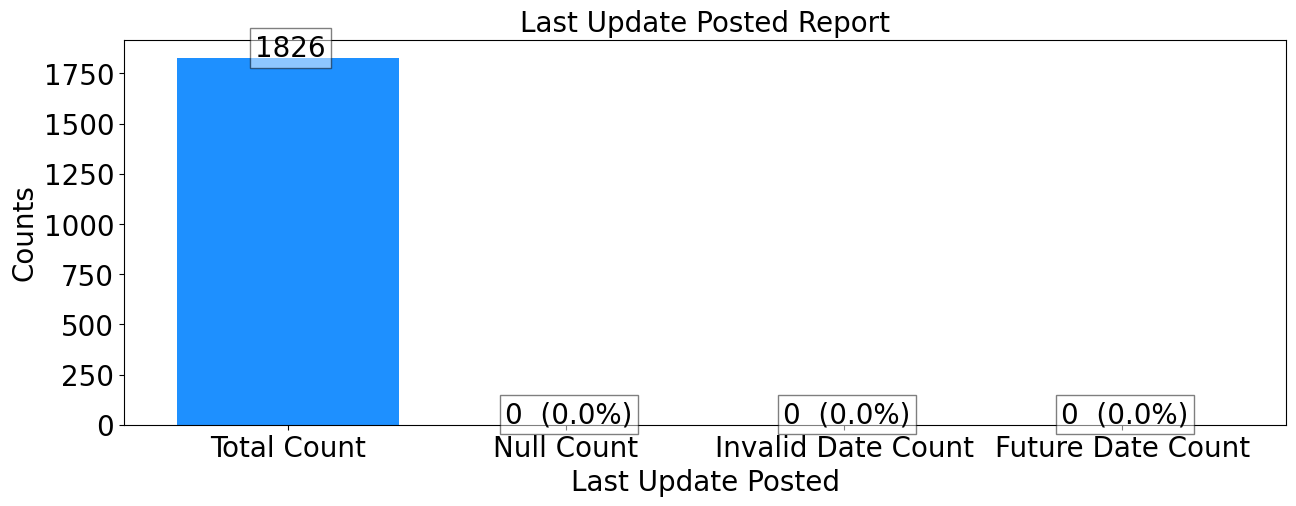

In [19]:
gen_date_plot(df)

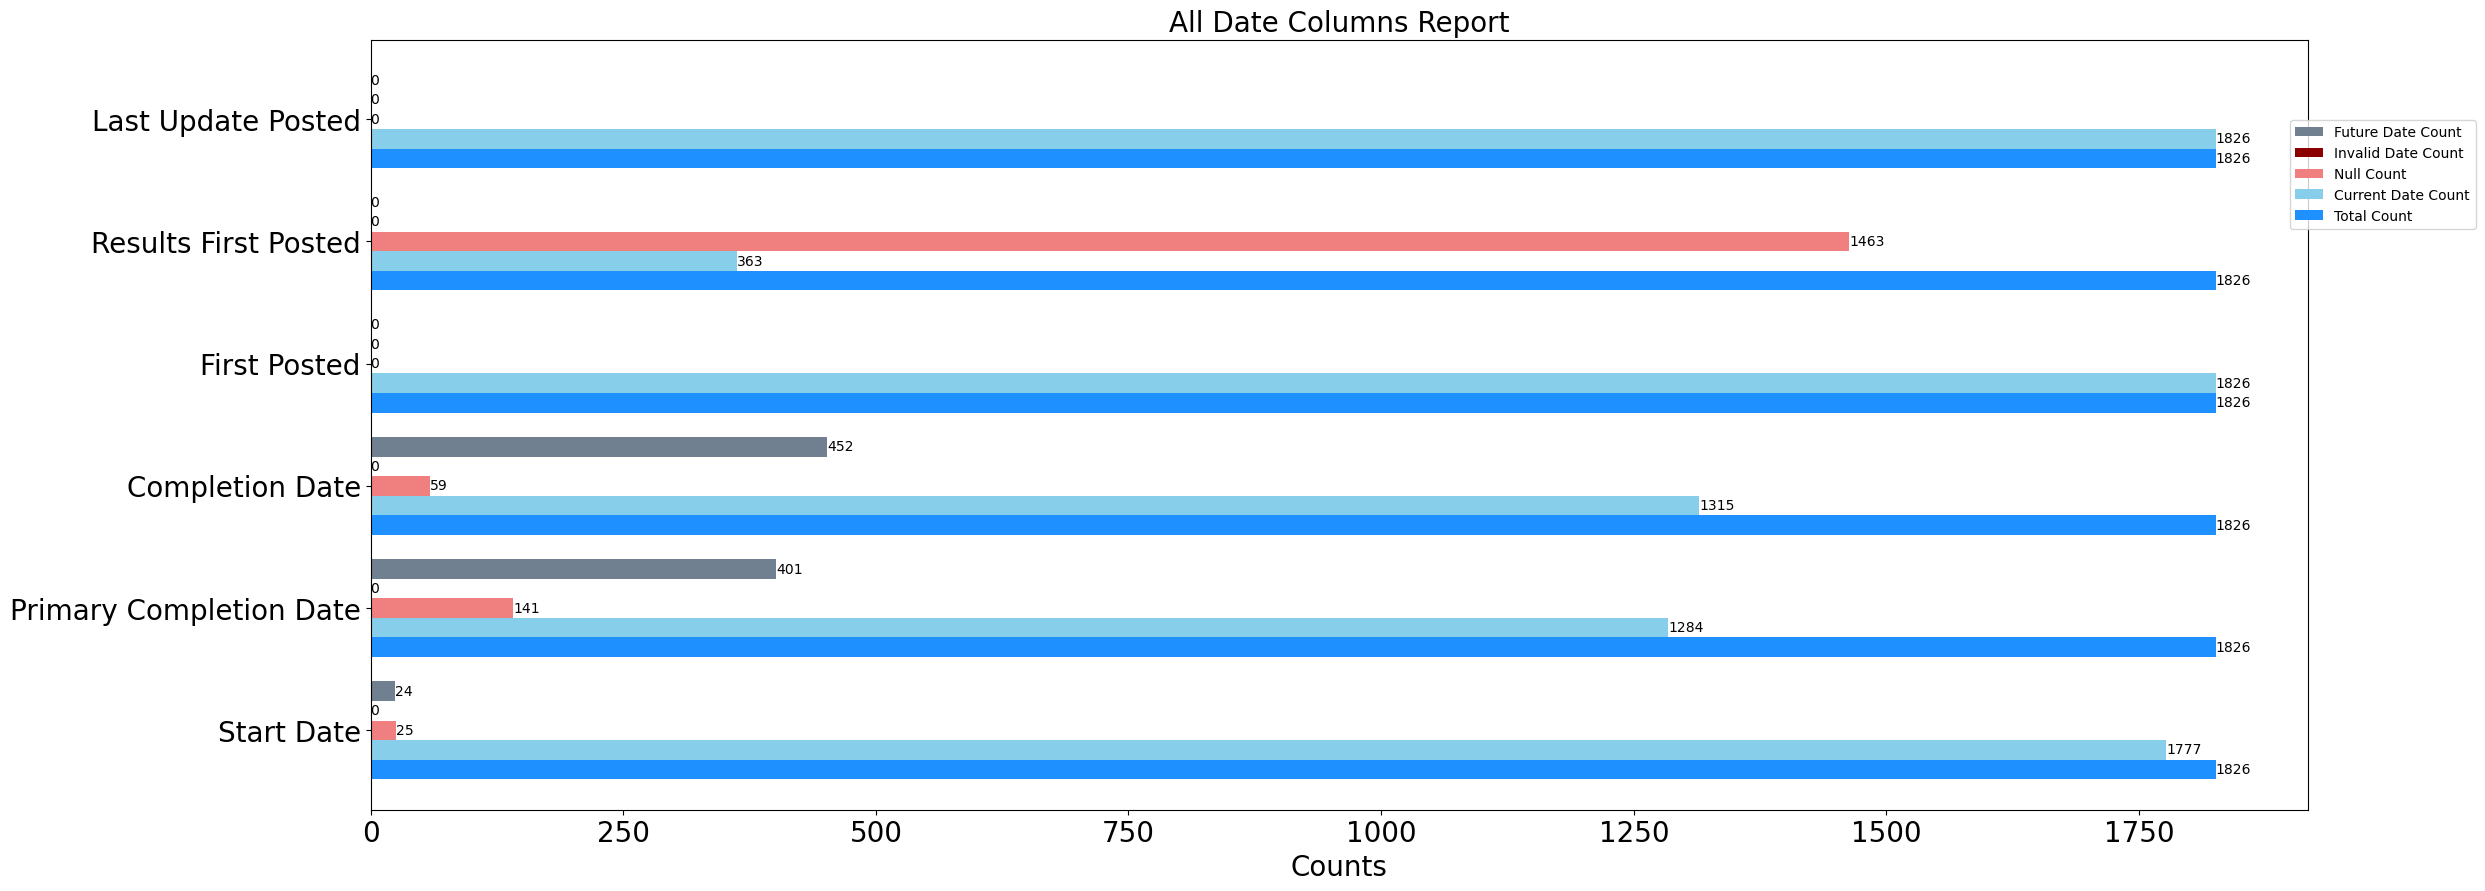

In [20]:
gen_date_overview_plot(example_date_report)